# Crawling Pipeline Advanced

이번 챕터에서는 기초 파이프라인을 **함수화 + 예외 처리**로 확장합니다.


In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

def crawl_quotes(url, max_pages=3):
    quotes = []
    for page in range(1, max_pages+1):
        try:
            res = requests.get(f"{url}/page/{page}/", timeout=5)
            res.raise_for_status()
            soup = BeautifulSoup(res.text, "html.parser")

            for q in soup.select(".quote"):
                text = q.select_one(".text").get_text()
                author = q.select_one(".author").get_text()
                quotes.append({"text": text, "author": author})

            time.sleep(1)  # 서버 과부하 방지
        except Exception as e:
            print(f"⚠️ Error on page {page}: {e}")
    return pd.DataFrame(quotes)

df = crawl_quotes("https://quotes.toscrape.com", max_pages=3)
df.head()


,text,author
0,“The world as we have created it is a process ...,Albert Einstein
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling
2,“There are only two ways to live your life. On...,Albert Einstein
3,"“The person, be it gentleman or lady, who has ...",Jane Austen
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe


In [2]:
def save_data(df, fname="quotes.csv"):
    df.to_csv(fname, index=False, encoding="utf-8-sig")
    print(f"✅ 저장 완료: {fname}")

save_data(df)


✅ 저장 완료: quotes.csv


In [3]:
df_loaded = pd.read_csv("quotes.csv")
df_loaded["author"].value_counts().head(5)


author
Albert Einstein    6
J.K. Rowling       3
Marilyn Monroe     2
Dr. Seuss          2
Bob Marley         2
Name: count, dtype: int64

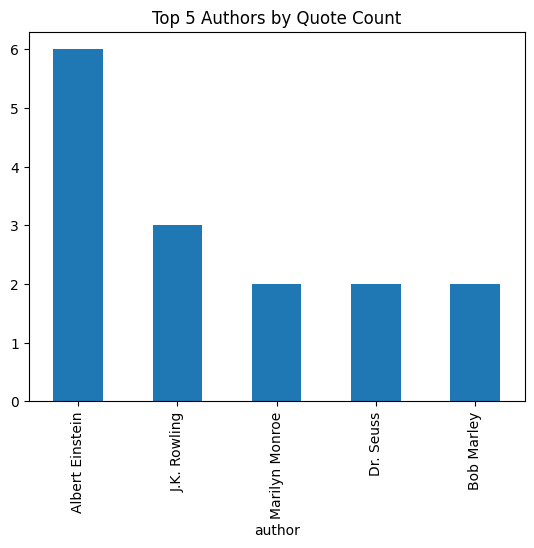

In [4]:
import matplotlib.pyplot as plt

df_loaded["author"].value_counts().head(5).plot(kind="bar")
plt.title("Top 5 Authors by Quote Count")
plt.show()
